**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase
from sklearn.neighbors.base import KNeighborsMixin
from sklearn.neighbors.base import SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# %load_ext pycodestyle_magic


In [49]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n = n_neighbors
        self.features = np.empty(0)
        self.labels = np.empty(0)

    def fit(self, X, y):
        self.features = np.array(X, dtype=np.float64)
        self.labels = np.array(y, dtype=np.int64)
        self.classes = self.labels.max()

    def predict(self, X):
        x = np.array(X, dtype=np.float64)
        res = np.empty(x.shape[0])
        x_dist = (x ** 2).sum(axis=1)
        f_dist = (self.features ** 2).sum(axis=1)
        xy_dist = np.dot(x, self.features.T)
        dist = - 2 * xy_dist + f_dist + x_dist.reshape(x_dist.shape[0], 1)
        dist = np.sqrt(dist)
        nearest = np.argpartition(dist, self.n, axis=1)
        tmp = np.take(self.labels, nearest[0:, 0:self.n])
        for i, st in enumerate(tmp):
            res[i] = np.bincount(st).argmax()
        return res

    def predict_proba(self, X):
        x = np.array(X, dtype=np.float64)
        res = np.empty((x.shape[0], self.classes+1))
        x_dist = (x ** 2).sum(axis=1)
        f_dist = (self.features ** 2).sum(axis=1)
        xy_dist = np.dot(x, self.features.T)
        dist = - 2 * xy_dist + f_dist + x_dist.reshape(x_dist.shape[0], 1)
        dist = np.sqrt(dist)
        nearest = np.argpartition(dist, self.n, axis=1)
        tmp = np.take(self.labels, nearest[0:, 0:self.n])
        for i, st in enumerate(tmp):
            tmp2 = np.bincount(st)
            tmp2.resize((self.classes+1,), refcheck=False)
            res[i] = tmp2
        res /= self.n
        return res

    def score(self, X, y):
        tmp = self.predict(X)
        res = 0.0
        for i, label in enumerate(tmp):
            if label == y[i]:
                res += 1
        res /= len(y)
        return res


**IRIS**

In [133]:
iris = datasets.load_iris()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [135]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [136]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 859 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [137]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 113 µs


In [138]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.12 ms


array([1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2])

In [139]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 318 µs


array([1., 2., 1., 0., 2., 2., 2., 1., 0., 0., 2., 0., 0., 1., 2.])

In [140]:
%time clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.82 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [141]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.59 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [142]:
clf.score(X_test, y_test)

0.9333333333333333

In [143]:
my_clf.score(X_test, y_test)

0.9333333333333333

8


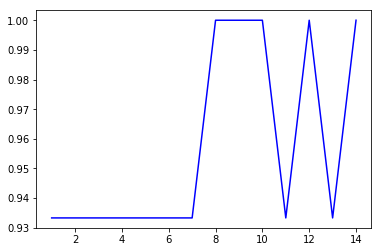

In [146]:
# Задание 3
neighbors = range(1, 15)
acc = []
for k in neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=k)
    my_clf.fit(X_train, y_train)
    acc.append(my_clf.score(X_test, y_test))
plt.plot(neighbors, acc, color='blue')
print np.array(acc).argmax()+1


**MNIST**

In [62]:
mnist = fetch_mldata('MNIST original')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.001, stratify=mnist.target)

In [64]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [65]:
%time clf.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 152 ms, total: 30.6 s
Wall time: 30.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [66]:
%time my_clf.fit(X_train, y_train)

CPU times: user 68 ms, sys: 620 ms, total: 688 ms
Wall time: 702 ms


In [67]:
%time clf.predict(X_test)

CPU times: user 8 s, sys: 4 ms, total: 8 s
Wall time: 8.07 s


array([0., 3., 1., 6., 0., 2., 8., 6., 9., 1., 1., 6., 6., 7., 8., 5., 8.,
       3., 8., 2., 7., 7., 8., 3., 2., 0., 7., 3., 7., 2., 2., 1., 4., 4.,
       0., 5., 2., 6., 9., 3., 7., 5., 9., 4., 3., 6., 1., 9., 1., 0., 7.,
       1., 9., 9., 6., 4., 4., 4., 3., 9., 2., 5., 8., 0., 5., 1., 0., 8.,
       6., 4.])

In [68]:
%time my_clf.predict(X_test)

CPU times: user 672 ms, sys: 724 ms, total: 1.4 s
Wall time: 1.16 s


array([0., 3., 1., 6., 0., 2., 8., 6., 9., 1., 1., 6., 6., 7., 8., 5., 8.,
       3., 8., 2., 7., 7., 8., 3., 2., 0., 7., 3., 7., 2., 2., 1., 4., 4.,
       0., 5., 2., 6., 9., 3., 7., 5., 9., 4., 3., 6., 1., 9., 1., 0., 7.,
       1., 9., 9., 6., 4., 4., 4., 3., 9., 2., 5., 8., 0., 5., 1., 0., 8.,
       6., 4.])

In [69]:
%time clf.predict_proba(X_test)

CPU times: user 7.68 s, sys: 28 ms, total: 7.7 s
Wall time: 7.72 s


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [70]:
%time my_clf.predict_proba(X_test)

CPU times: user 660 ms, sys: 484 ms, total: 1.14 s
Wall time: 808 ms


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [71]:
clf.score(X_test, y_test)

0.9857142857142858

In [72]:
my_clf.score(X_test, y_test)

0.9857142857142858

Задание 5

In [73]:
# seaborn
#  Библиотека для визуализации статистических данных(основана на matplotlib)
# matplotlib
#  Библиотека для визуализации данных двумерной графикой
# train_test_split
#  Разбивает массив случайным образом на обучающую и тестовую выборку
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
#  magic метод, который загружает функционал
# StandardScaler (from sklearn.preprocessing import StandardScaler)
#  Класс, содержит методы нормирования признаков, путем удаления среднего и
#  приведения к единичной дисперсии
# ClassifierMixin
#  класс с методом scale для любого классификатора возвращает точность
#  (на данной размеченной тестовой выборке)
# NeighborsBase
#  Базовый класс для потомков оценивающих, классификатор KNN
# KNeighborsMixin
#  Класс, участвующий в наследовании для потомков, ищущих K соседних
#  (содержит метод, определяющий расстояние до соседних точек
#  а также метод, вычисляющий граф соседних для данной точки)
# SupervisedIntegerMixin
#  В классе определен метод fit(self, X, y) обучающий модель
